This is ML Assignment 2 which focuses on the implementation of decision trees using ID3,CART,Random Forest and Gradient Boosted Trees. We compare the accuracy and performace of each model using various parameters and techniques.

In [ ]:
  !pip install tensorflow_decision_forests
  !pip install keras
 #these libraries are installed one time as colab doesn't have it.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 37.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import tf_keras
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,f1_score,precision_score,log_loss

In [ ]:
# Load the data from CSV files
patient_1 = pd.read_csv('/content/sample_data/221.csv')
patient_2 = pd.read_csv('/content/sample_data/230.csv')

# Display the first few rows of each dataset
print("Patient 1 Data:")
print(patient_1.head())

print("\nPatient 2 Data:")
print(patient_2.head())

Patient 1 Data:
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0

Patient 2 Data:
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0


In [ ]:
# Check for missing values in both datasets
print("Missing values in Patient 1 data:")
print(patient_1.isnull().sum())

print("\nMissing values in Patient 2 data:")
print(patient_2.isnull().sum())

Missing values in Patient 1 data:
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

Missing values in Patient 2 data:
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64


In [ ]:
initial_rows = patient_1.shape[0]
patient_1.drop_duplicates(inplace=True)
final_rows = patient_1.shape[0]
print(f"Number of duplicate rows removed: {initial_rows - final_rows}")

initial_rows = patient_2.shape[0]
patient_2.drop_duplicates(inplace=True)
final_rows = patient_2.shape[0]
print(f"Number of duplicate rows removed: {initial_rows - final_rows}")

Number of duplicate rows removed: 9445
Number of duplicate rows removed: 16551


In [ ]:
# We are using this custom formula instead of StandardScaler because StandardScaler was converting integer to string.
# Because of StandardScaler, the .fit() function of tfdf library was giving error
cols_to_normalize = patient_1.columns.difference(['Anomaly'])
patient_1[cols_to_normalize] = (patient_1[cols_to_normalize] - patient_1[cols_to_normalize].min()) / (patient_1[cols_to_normalize].max() - patient_1[cols_to_normalize].min())

cols_to_normalize = patient_2.columns.difference(['Anomaly'])
patient_2[cols_to_normalize] = (patient_2[cols_to_normalize] - patient_2[cols_to_normalize].min()) / (patient_2[cols_to_normalize].max() - patient_2[cols_to_normalize].min())

print(patient_1)
print(patient_2)

           RESP      BP-S      BP-D  SpO2        HR     PULSE  Anomaly
0      0.666667  0.245902  0.390244  0.98  0.616667  0.613445        0
1      0.690476  0.245902  0.390244  0.98  0.616667  0.613445        0
2      0.714286  0.245902  0.390244  0.98  0.616667  0.613445        0
3      0.714286  0.245902  0.390244  0.99  0.616667  0.613445        0
4      0.690476  0.245902  0.390244  0.99  0.608333  0.613445        0
...         ...       ...       ...   ...       ...       ...      ...
24994  0.642857  0.213115  0.304878  0.99  0.766667  0.781513        0
24995  0.642857  0.213115  0.329268  0.99  0.766667  0.781513        0
24996  0.642857  0.229508  0.341463  0.99  0.775000  0.781513        0
24997  0.642857  0.229508  0.329268  1.00  0.775000  0.806723        0
24998  0.642857  0.229508  0.341463  1.00  0.791667  0.806723        0

[15554 rows x 7 columns]
           RESP      BP-S      BP-D      SpO2        HR     PULSE  Anomaly
0      0.357143  0.097701  0.127273  0.888889  

In [ ]:
# Separating features and target variable (Anomaly)
X_patient_1 = patient_1.drop(columns=['Anomaly'])
y_patient_1 = patient_1['Anomaly']

X_patient_2 = patient_2.drop(columns=['Anomaly'])
y_patient_2 = patient_2['Anomaly']

# Split patient 1 data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_patient_1, y_patient_1, test_size=0.2, random_state=42)

# Split patient 2 data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_patient_2, y_patient_2, test_size=0.2, random_state=42)

Implementation of in-built ID3 using scikit learn:-

In [ ]:
# Initialize the DecisionTreeClassifier (using entropy for ID3)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on Patient 1's data
id3_model.fit(X_train_1, y_train_1)

# Make predictions on the test set
y_pred_1 = id3_model.predict(X_test_1)

# Evaluate the model
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print(f"ID3 Model Accuracy (Patient 1): {accuracy_1 * 100:.2f}%")

ID3 Model Accuracy (Patient 1): 99.00%


Implementation of custom ID3:-

In [ ]:
# Function to calculate entropy
def calculate_entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [ ]:
# Function to calculate information gain
def calculate_information_gain(X, y, feature_index):
    # Total entropy before the split
    total_entropy = calculate_entropy(y)

    # Values and counts of the selected feature
    values, counts = np.unique(X[:, feature_index], return_counts=True)

    # Weighted entropy after the split
    weighted_entropy = 0
    for value, count in zip(values, counts):
        # Subset the data for this value
        subset_y = y[X[:, feature_index] == value]

        # Calculate entropy of the subset
        entropy_subset = calculate_entropy(subset_y)

        # Calculate the weighted entropy
        weighted_entropy += (count / len(y)) * entropy_subset

    # Information gain is the reduction in entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain


In [ ]:
# Function to find the best feature to split on
def find_best_split(X, y):
    best_feature_index = -1
    best_info_gain = -1

    # Loop through all features to calculate information gain
    for feature_index in range(X.shape[1]):
        info_gain = calculate_information_gain(X, y, feature_index)

        # Update the best feature if this one has higher information gain
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature_index = feature_index

    return best_feature_index, best_info_gain

# Example usage
best_feature, best_info_gain = find_best_split(X_train_1.values, y_train_1.values)
print(f"Best Feature Index: {best_feature}, Information Gain: {best_info_gain}")

Best Feature Index: 4, Information Gain: 0.23076439114593178


In [ ]:
# ID3 Decision Tree Class
class ID3DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        # If all targets are the same, return the label
        if len(np.unique(y)) == 1:
            return y[0]

        # If the dataset is empty or max depth is reached, return the majority label
        if len(X) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return np.bincount(y).argmax()

        # Find the best feature to split on
        best_feature, best_info_gain = find_best_split(X, y)

        # Create a node
        tree = {best_feature: {}}

        # Split the dataset on the best feature
        feature_values = np.unique(X[:, best_feature])

        for value in feature_values:
            subset_X = X[X[:, best_feature] == value]
            subset_y = y[X[:, best_feature] == value]

            # Recursively build the subtree
            subtree = self.fit(subset_X, subset_y, depth + 1)
            tree[best_feature][value] = subtree

        return tree

    def predict_sample(self, sample, tree):
        # Base case: If tree is not a dictionary, return the label
        if not isinstance(tree, dict):
            return tree

        # Traverse the tree
        feature = list(tree.keys())[0]
        value = sample[feature]

        # Get the subtree for this feature value
        if value in tree[feature]:
            return self.predict_sample(sample, tree[feature][value])
        else:
            return np.bincount(y_train_1).argmax()  # If the value doesn't exist, return majority class

    def predict(self, X):
        return [self.predict_sample(sample, self.tree) for sample in X]

# Initialize and train the custom ID3 model
id3_custom_model = ID3DecisionTree(max_depth=3)
id3_custom_model.tree = id3_custom_model.fit(X_train_1.values, y_train_1.values)

# Predict on the test set
y_pred_custom = id3_custom_model.predict(X_test_1.values)

# Evaluate the model
accuracy_custom = accuracy_score(y_test_1, y_pred_custom)
print(f"Custom ID3 Model Accuracy (Patient 1): {accuracy_custom * 100:.2f}%")

Custom ID3 Model Accuracy (Patient 1): 97.72%


Comparing Both the results:-

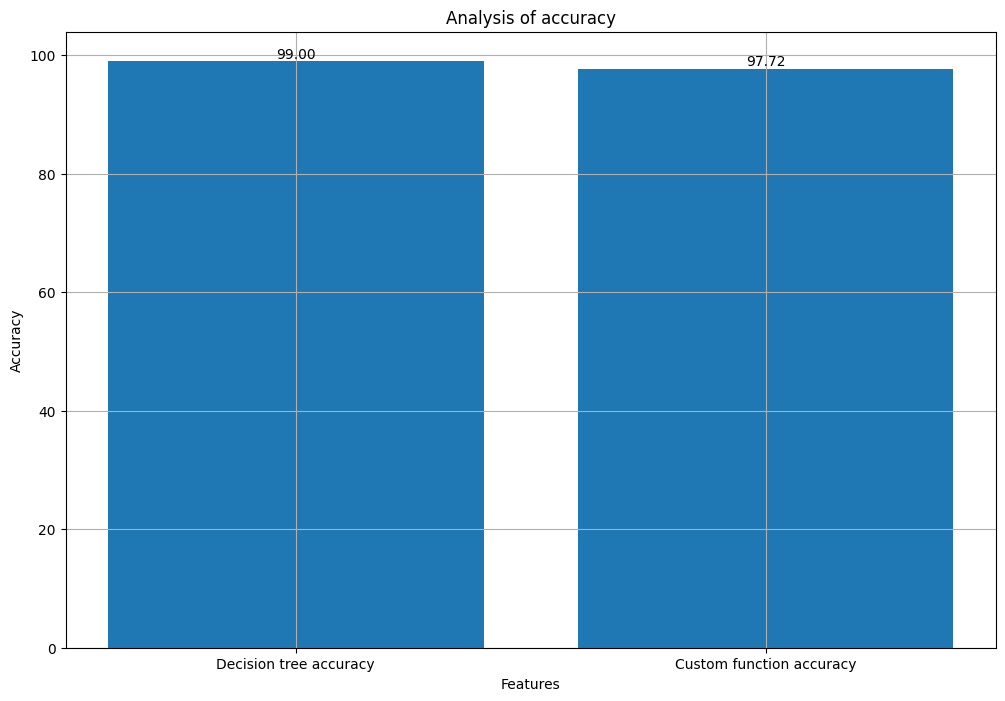

In [ ]:
plt.figure(figsize=(12, 8))
value = ['Decision tree accuracy','Custom function accuracy']
accuracies = [accuracy_1*100, accuracy_custom*100]
bars = plt.bar(value, accuracies)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Analysis of accuracy')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

CART decision tree using scikit learn:-

In [ ]:
# Initialize the DecisionTreeClassifier (using Gini index for CART)
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model on Patient 2's data
cart_model.fit(X_train_2, y_train_2)

# Make predictions on the test set
y_pred_cart = cart_model.predict(X_test_2)

# Evaluate the model
accuracy_cart = accuracy_score(y_test_2, y_pred_cart)
print(f"CART Model Accuracy (Patient 2): {accuracy_cart * 100:.2f}%")


CART Model Accuracy (Patient 2): 98.76%


In [ ]:
# Reset index to avoid misalignment
X_train_2 = X_train_2.reset_index(drop=True)
X_test_2 = X_test_2.reset_index(drop=True)

# Reset index of the labels
y_train_2 = y_train_2.reset_index(drop=True)
y_test_2 = y_test_2.reset_index(drop=True)

# Concatenate correctly aligned datasets
train_data_2 = pd.concat([X_train_2, y_train_2], axis=1)
test_data_2 = pd.concat([X_test_2, y_test_2], axis=1)

CART decision tree using tensorflow

In [ ]:
# Convert to TensorFlow datasets
train_dataset_2 = tfdf.keras.pd_dataframe_to_tf_dataset(train_data_2, label="Anomaly")
test_dataset_2 = tfdf.keras.pd_dataframe_to_tf_dataset(test_data_2, label="Anomaly")

# Initialize and train the CART model
cart_model_tf = tfdf.keras.CartModel()
cart_model_tf.fit(train_dataset_2)

Use /tmp/tmpsscotuln as temporary training directory
Reading training dataset...
Training dataset read in 0:00:11.676196. Found 6759 examples.
Training model...
Model trained in 0:00:00.132859
Compiling model...
Model compiled.


In [ ]:
# Compile the CART model with the accuracy metric
cart_model_tf.compile(metrics=["accuracy"])

# Evaluate the model and return the evaluation results as a dictionary
evaluation_tf = cart_model_tf.evaluate(test_dataset_2, return_dict=True)

# Print all evaluation metrics with their respective values
for name, value in evaluation_tf.items():
    print(f"{name}: {value * 100:.2f}%")


2/2 [==============================] - 2s 53ms/step - loss: 0.0000e+00 - accuracy: 0.9722
loss: 0.00%
accuracy: 97.22%


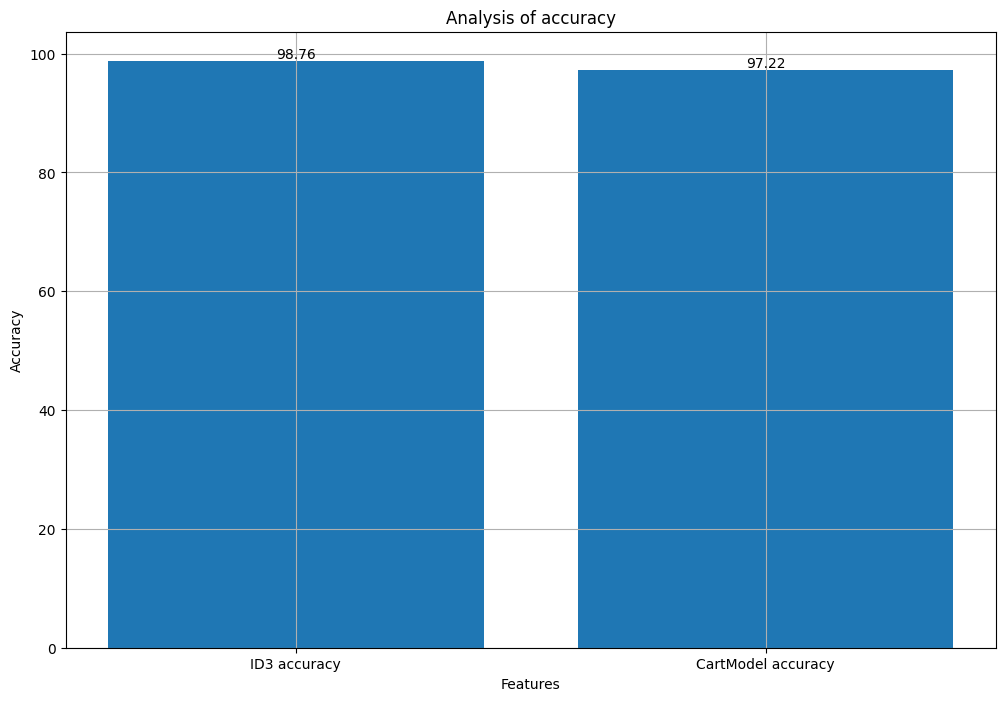

In [ ]:
plt.figure(figsize=(12, 8))
value = ['ID3 accuracy','CartModel accuracy']
accuracies = [accuracy_cart * 100, evaluation_tf['accuracy']*100]
bars = plt.bar(value, accuracies)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Analysis of accuracy')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Comparision:-

In [ ]:
# Calculate metrics for ID3 non-custom
accuracy_id11 = accuracy_score(y_test_1, y_pred_1)
precision_id11 = precision_score(y_test_1, y_pred_1, average='binary')
recall_id11 = recall_score(y_test_1, y_pred_1, average='binary')
f1_id11 = f1_score(y_test_1, y_pred_1, average='binary')

# Calculate metrics for CART using decisionTreeClassifier
accuracy_cart21 = accuracy_score(y_test_2, y_pred_cart)
precision_cart21 = precision_score(y_test_2, y_pred_cart, average='binary')
recall_cart21 = recall_score(y_test_2, y_pred_cart, average='binary')
f1_cart21 = f1_score(y_test_2, y_pred_cart, average='binary')

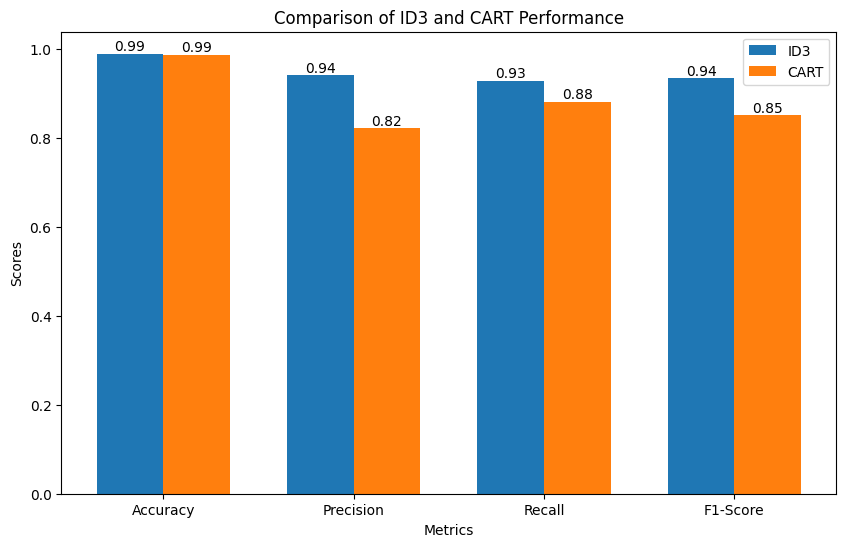

In [ ]:
# Set up the metrics and labels
metrics_id = [accuracy_id11, precision_id11, recall_id11, f1_id11]
metrics_cart = [accuracy_cart21, precision_cart21, recall_cart21, f1_cart21]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set up the plot
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bar1 = ax.bar(x - width/2, metrics_id, width, label='ID3')
bar2 = ax.bar(x + width/2, metrics_cart, width, label='CART')

# Add labels, title, and custom ticks on the x-axis
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ID3 and CART Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add bar values on top
def add_bar_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Add values to bars
add_bar_labels(bar1)
add_bar_labels(bar2)

# Display the plot
plt.show()


**Insights**:-

**ID3**
1. Uses entropy and information gain
2. Slower due to entropy calculations, especially on large datasets
3. Limited handling of continuous data (primarily categorical features)

**CART**
1. Uses Gini impurity for classification
2. More efficient, faster due to Gini impurity being easier to calculate
3. Supports both continuous and categorical data


Tensorflow Random Forest Model for Patient 1 data as follows:

In [ ]:
patient_1.describe()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
count,15554.000000,15554.000000,15554.000000,15554.000000,15554.000000,15554.000000,15554.000000
mean,0.573238,0.299111,0.411017,0.990276,0.745016,0.745708,0.083515
std,0.115007,0.083028,0.112846,0.014773,0.083930,0.080221,0.276669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.245902,0.317073,0.980000,0.683333,0.680672,0.000000
50%,0.547619,0.295082,0.402439,0.990000,0.741667,0.747899,0.000000
75%,0.619048,0.344262,0.500000,1.000000,0.800000,0.798319,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Creation, training and testing of Random Forest Model

In [ ]:
#Split the patient_1 dataset into training and testing modules
X1 = patient_1.drop(columns = 'Anomaly')
Y1 = patient_1['Anomaly']
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.2)

In [ ]:
#Combine features and targets(X and Y)
pd_train = X_train1.assign(Anomaly=Y_train1)
pd_test = X_test1.assign(Anomaly=Y_test1)
X_train_tf1 = tfdf.keras.pd_dataframe_to_tf_dataset(pd_train,label="Anomaly")
X_test_tf1 = tfdf.keras.pd_dataframe_to_tf_dataset(pd_test,label="Anomaly")

In [ ]:
#Create and train the model
tfdf_model = tfdf.keras.RandomForestModel()
tfdf_model.fit(X_train_tf1)


Use /tmp/tmpphearxyt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.677297. Found 12443 examples.
Training model...
Model trained in 0:00:06.087362
Compiling model...
Model compiled.


Evaluation of Random Forest Model



In [ ]:
# Compile the model with the accuracy metric
tfdf_model.compile(metrics=["accuracy"])

# Evaluate the model and return results as a dictionary
evaluation = tfdf_model.evaluate(X_test_tf1, return_dict=True)

# Print evaluation results
for name, value in evaluation.items():
    print(f"{name}: {value*100:.4f}%")
print(evaluation)

4/4 [==============================] - 1s 41ms/step - loss: 0.0000e+00 - accuracy: 0.9939
loss: 0.0000%
accuracy: 99.3893%
{'loss': 0.0, 'accuracy': 0.9938926100730896}


Visualising one of the trees in the Random Forest

In [ ]:
tfdf.model_plotter.plot_model_in_colab(tfdf_model, tree_idx=0, max_depth=3)


Visualising the Hypothesis space of the Random Forest Model

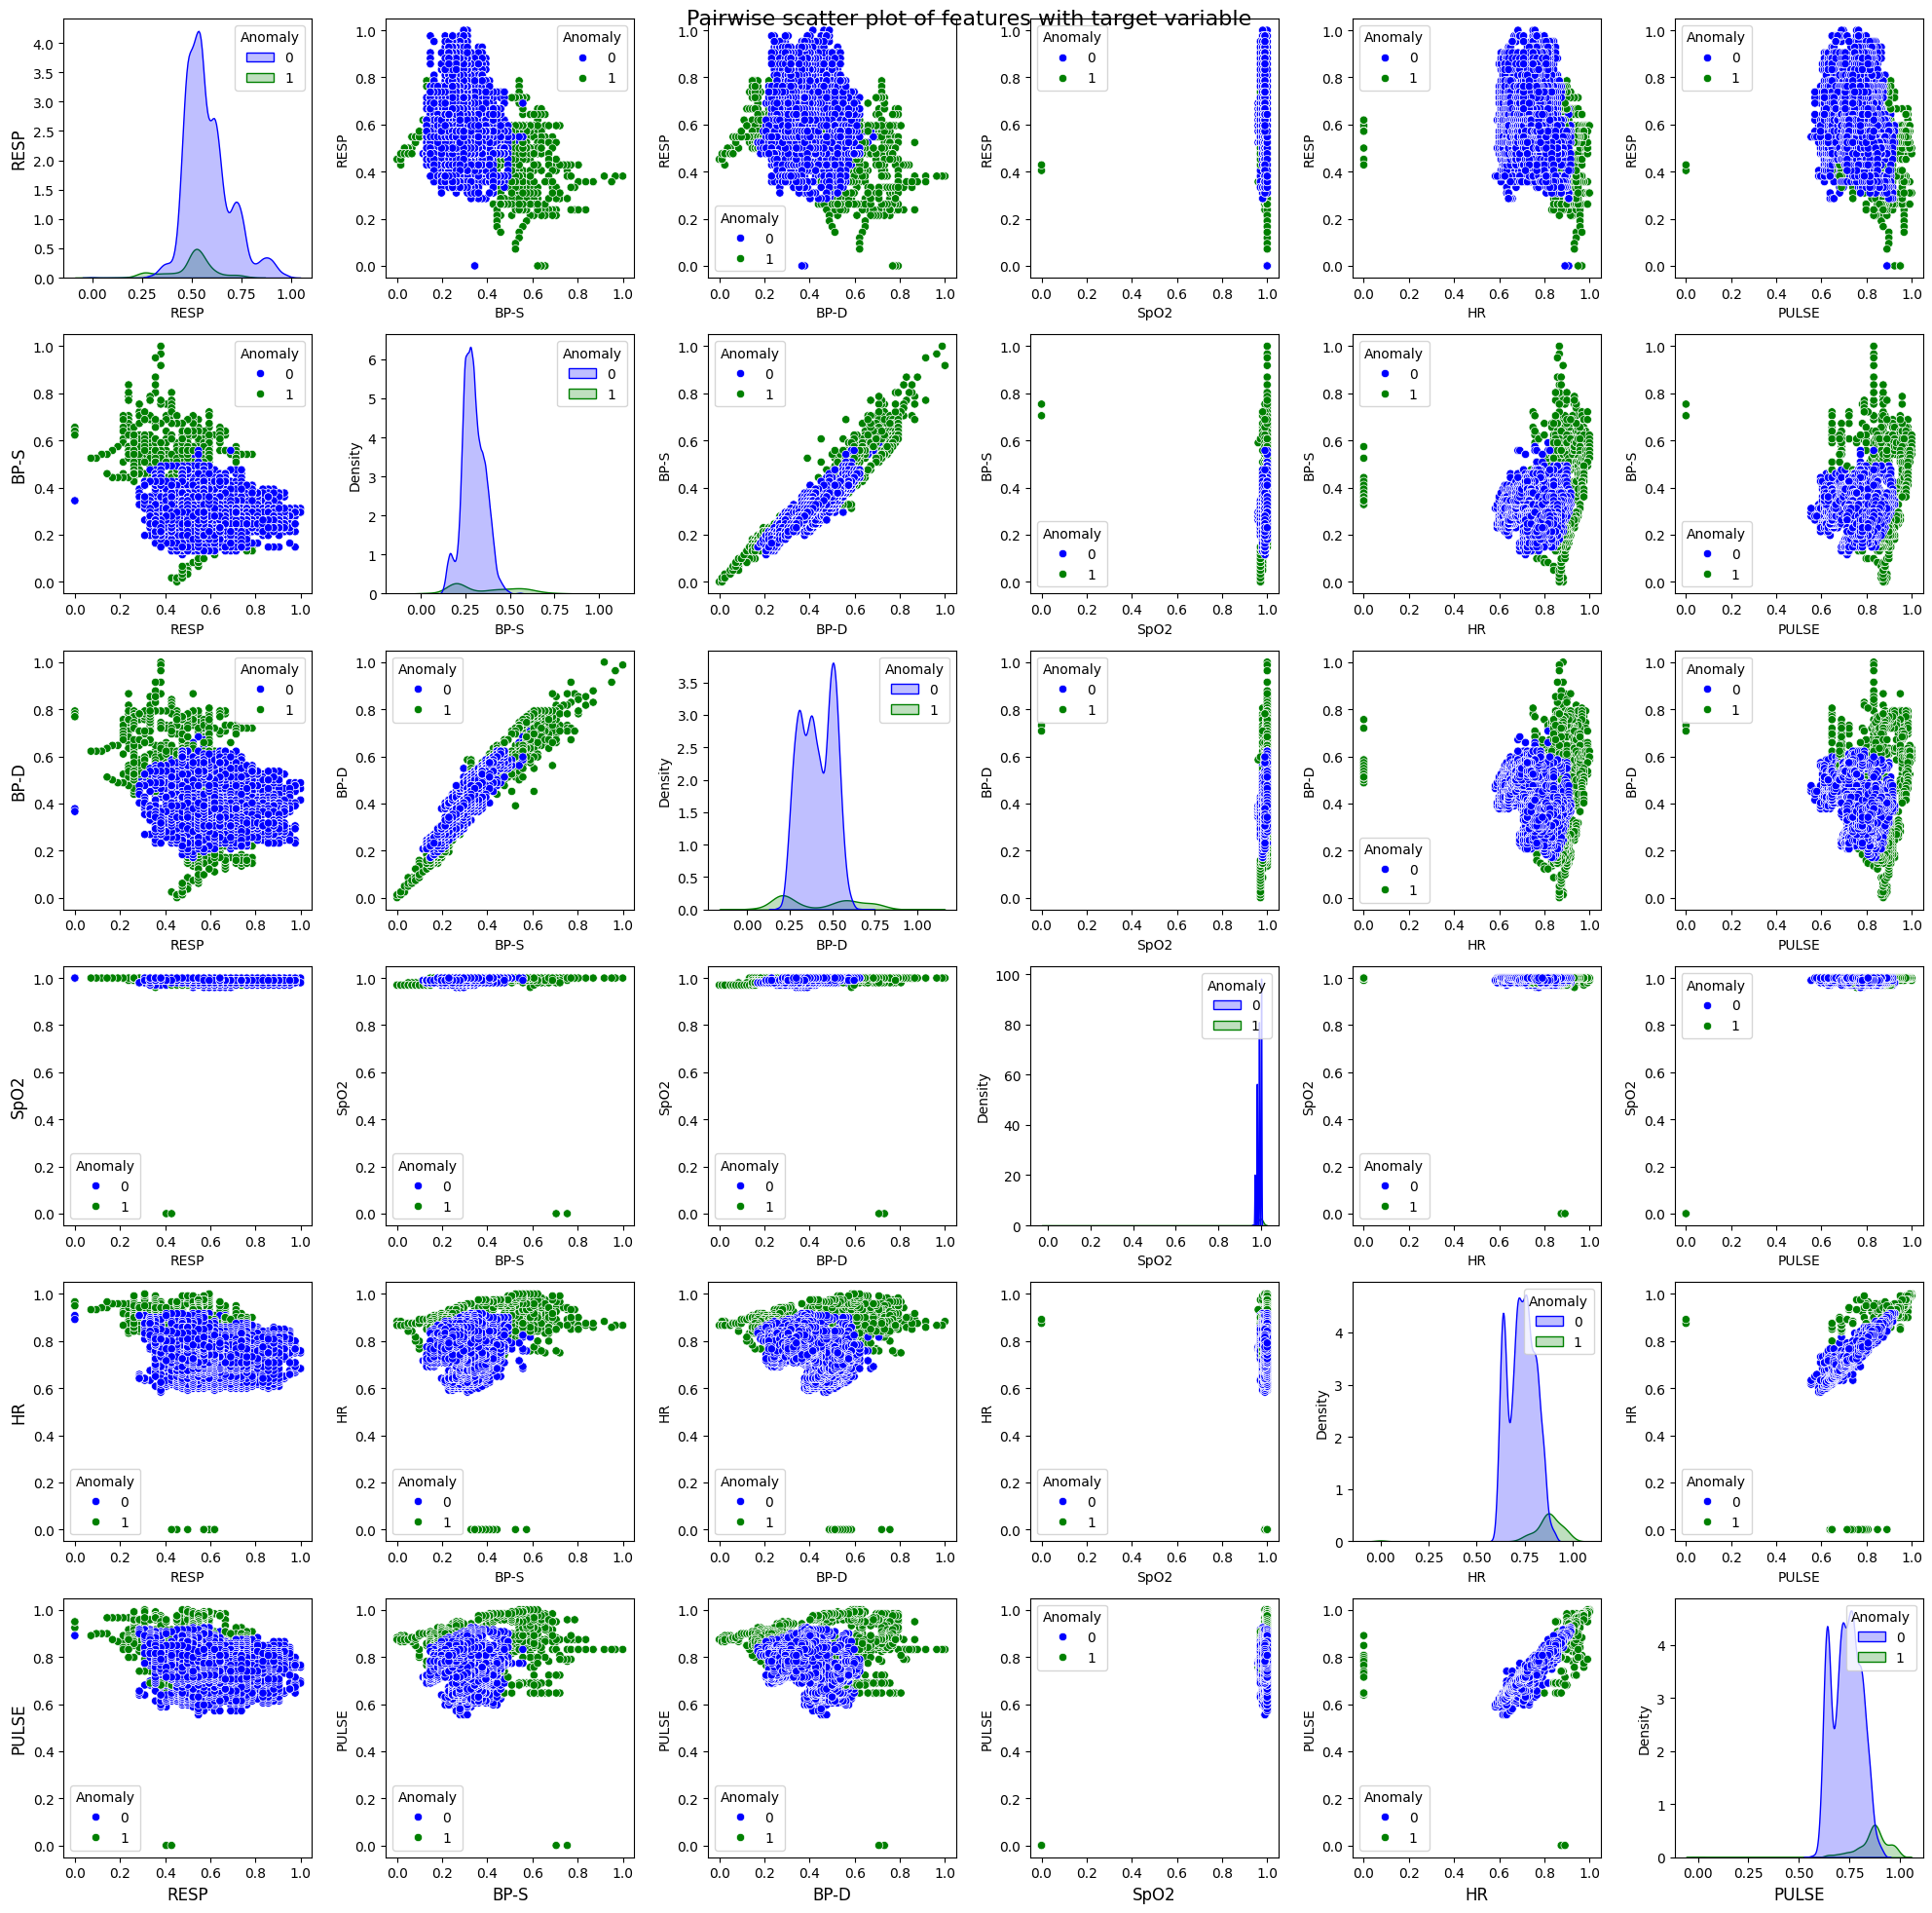

In [ ]:
features = X1.columns.tolist()
target = Y1

fig, axes = plt.subplots(6, 6, figsize=(20, 20))
plt.suptitle('Pairwise scatter plot of features with target variable',fontsize = 16)
for i,feature_x in enumerate(features):
  for j,feature_y in enumerate(features):
    if i!=j:
      sns.scatterplot(x = X1[feature_y],y = X1[feature_x],hue = target,palette = {0:'blue',1:'green'},ax = axes[i,j])
    else:
      sns.kdeplot(x=X1[feature_x],hue = target,palette = {0:'blue',1:'green'},ax = axes[i,j],fill = True)


for i, feature in enumerate(features):
    axes[i, 0].set_ylabel(feature, fontsize=12)
    axes[5, i].set_xlabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

# sns.pairplot(data221, hue='Anomaly', diag_kind='kde', palette='coolwarm')

Relative importance of features in random forest model

In [ ]:
inspector = tfdf_model.make_inspector()
feature_importances = inspector.variable_importances()
print(feature_importances)

{'NUM_AS_ROOT': [("HR" (1; #2), 196.0), ("PULSE" (1; #3), 76.0), ("BP-S" (1; #1), 21.0), ("BP-D" (1; #0), 7.0)], 'INV_MEAN_MIN_DEPTH': [("HR" (1; #2), 0.46892520301973595), ("BP-D" (1; #0), 0.3694397804237594), ("BP-S" (1; #1), 0.21018011412404183), ("PULSE" (1; #3), 0.18864474487680447), ("SpO2" (1; #5), 0.133508427468882), ("RESP" (1; #4), 0.12816623295417726)], 'NUM_NODES': [("BP-D" (1; #0), 5869.0), ("BP-S" (1; #1), 5423.0), ("RESP" (1; #4), 5279.0), ("PULSE" (1; #3), 5262.0), ("HR" (1; #2), 5223.0), ("SpO2" (1; #5), 1725.0)], 'SUM_SCORE': [("HR" (1; #2), 403007.9664814193), ("BP-D" (1; #0), 226281.82070990597), ("PULSE" (1; #3), 151824.65261246616), ("BP-S" (1; #1), 135209.36469567567), ("SpO2" (1; #5), 87029.28521767829), ("RESP" (1; #4), 37512.42269891582)]}


Gradient Boosted Decision Tree for patient 2

In [ ]:
gbdt_model = GradientBoostingClassifier()
gbdt_model.fit(X_train_2, y_train_2)
n_trees_gbdt = gbdt_model.n_estimators
y_pred = gbdt_model.predict(X_test_2)
y_proba = gbdt_model.predict_proba(X_test_2)

# Log Loss
logloss = log_loss(y_test_2, y_proba)
print(f"Log Loss: {logloss:.4f}")

# Accuracy
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Log Loss: 0.0444
Accuracy: 98.64%


Relative importance of features in GBDT model

In [ ]:
feature_importances = gbdt_model.feature_importances_
for i, feature in enumerate(X_train_2.columns):
    print(f"{feature}: {feature_importances[i]}")

RESP: 0.19931566359231245
BP-S: 0.1295172967542829
BP-D: 0.07740313068048363
SpO2: 0.24724022743413157
HR: 0.2622054308465221
PULSE: 0.08431825069226748


In [ ]:

gbdt_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gbdt_grid_search = GridSearchCV(estimator=gbdt_model, param_grid=gbdt_param_grid, cv=5, scoring='accuracy')
gbdt_grid_search.fit(X_train_2, y_train_2)

gbdt_best_model = gbdt_grid_search.best_estimator_
gbdt_y_pred = gbdt_best_model.predict(X_test_2)
gbdt_y_pred_proba = gbdt_best_model.predict_proba(X_test_2)

gbdt_accuracy = accuracy_score(y_test_2, gbdt_y_pred)
gbdt_log_loss = log_loss(y_test_2, gbdt_y_pred_proba)

print(f"Best accuracy of GBDT : {gbdt_accuracy*100:.4f}")
print(f"Best log loss of GBDT : {gbdt_log_loss*100:.4f}")

# Compile the model with the accuracy metric
tfdf_model.compile(metrics=["accuracy"])

# Evaluate the model and return results as a dictionary
evaluation = tfdf_model.evaluate(X_test_tf1, return_dict=True)

# Print evaluation results
for name, value in evaluation.items():
    print(f"Random Forest {name}: {value*100:.4f}%")

Best accuracy of GBDT : 99.2308
Best log loss of GBDT : 3.2093
4/4 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.9939
Random Forest loss: 0.0000%
Random Forest accuracy: 99.3893%
